In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('news.csv')

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [5]:
df=df.drop(['Unnamed: 0', 'title'], axis=1)

In [6]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [7]:
df.shape

(6335, 2)

In [8]:
df['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [9]:
df['text']

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [10]:
df[df['text'].str.isspace()].index

Int64Index([ 106,  710,  806,  919,  940, 1664, 1736, 1851, 1883, 1941, 2244,
            2426, 2576, 2662, 2788, 2832, 3073, 3350, 3511, 3641, 3642, 4014,
            4142, 4253, 4713, 4744, 5017, 5088, 5213, 5581, 5639, 5699, 5772,
            6064, 6175, 6328],
           dtype='int64')

In [11]:
df=df.drop(index=df[df['text'].str.isspace()].index, axis=0)

In [12]:
df[df['text'].str.isspace()].index

Int64Index([], dtype='int64')

In [13]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [14]:
X=df['text']

In [15]:
y=df['label']

In [16]:
X

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6299, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf=TfidfVectorizer(stop_words='english')

In [19]:
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train_tfidf=tfidf.fit_transform(X_train)

In [22]:
X_test_tfidf=tfidf.transform(X_test)

In [23]:
X_train_tfidf

<5039x60791 sparse matrix of type '<class 'numpy.float64'>'
	with 1328048 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [25]:
def report_model_score(model):
    score=cross_val_score(model,X_train_tfidf,y_train,scoring='accuracy')
    score=score.mean()
    print(model)
    
    print(score)

In [26]:
lv=LinearSVC()

In [27]:
report_model_score(lv)

LinearSVC()
0.9353046531422897


In [28]:
naive=MultinomialNB()

In [29]:
report_model_score(naive)

MultinomialNB()
0.8259583707696916


In [30]:
bern=BernoulliNB()

In [31]:
report_model_score(bern)

BernoulliNB()
0.8245696789142668


In [32]:
svc=LinearSVC()

In [33]:
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [34]:
from sklearn.metrics import classification_report, plot_confusion_matrix

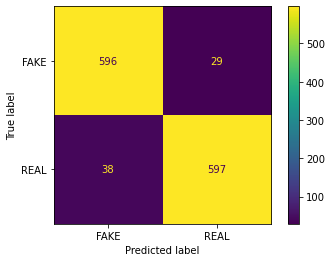

In [35]:
plot_confusion_matrix(svc,X_test_tfidf,y_test)

In [37]:
print(classification_report(y_test, svc.predict(X_test_tfidf)))

              precision    recall  f1-score   support

        FAKE       0.94      0.95      0.95       625
        REAL       0.95      0.94      0.95       635

    accuracy                           0.95      1260
   macro avg       0.95      0.95      0.95      1260
weighted avg       0.95      0.95      0.95      1260



In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipe=Pipeline([('tfidf',TfidfVectorizer()), ('svc',LinearSVC())])

In [40]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [45]:
svc.predict(X_test_tfidf)

array(['REAL', 'REAL', 'REAL', ..., 'FAKE', 'FAKE', 'FAKE'], dtype=object)